In [29]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import json
import seaborn as sns

In [30]:
def load_jsonl(pth:str):
    with open(pth, 'r') as f:
        return [json.loads(l) for l in f]

In [31]:
d = 1
walks = 1000
steps = 1000000
predir = 'statistics_jsonl'

In [32]:
data = load_jsonl(f'{predir}/dim-{d}_walks-{walks}_steps-{steps}.jsonl')

In [33]:
data[0].keys()

dict_keys(['back_to_zero', 'section', 'last_x'])

In [34]:
res = []
for d in data:
    n_minus = 0
    n_plus = 0
    n_origin = 0
    for sec in d["section"]:
        if sec == 1: n_plus += 1
        elif sec == -1: n_minus += 1
        elif sec == 0: n_origin += 1
        else: raise ValueError(f"Invalid section value: {sec}")

    m = 1/2 * (n_origin) + max(n_plus, n_minus)
    n = steps
    res.append(m/n)

0.8061017265 0.1544780022342937


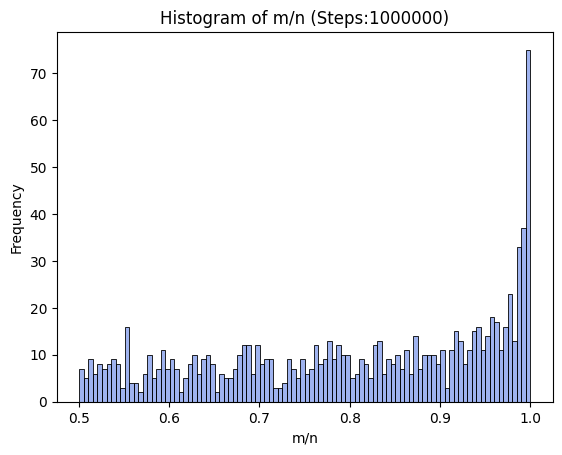

In [35]:
res = np.array(res)
print(res.mean(), res.std())


fig = plt.figure()
fig.add_axes(sns.histplot(res, bins=100, linewidth=0.6,color='royalblue', alpha=0.5))
plt.xlabel('m/n')
plt.ylabel('Frequency')
plt.title(f'Histogram of m/n (Steps:{steps})')
plt.savefig(f'statistics_graph/dim-1_walks-1000_steps-{steps}_hist.png')
plt.show()